In [6]:
import numpy as np
import proplot as pplt
import meds

0.00201966 0.00201966


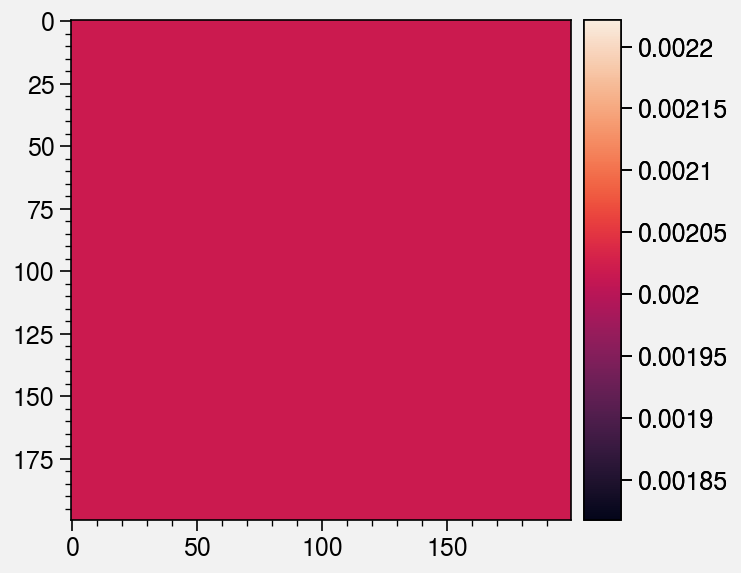

In [4]:
with meds.MEDS("DES2229-3957_r_des-pizza-slices-y6-v9_meds-pizza-slices-range0706-0710.fits") as md:
    wgt = md.get_cutout(706, 0, type="weight")
    fig, axs = pplt.subplots()
    m = axs.imshow(wgt, cmap="rocket")
    axs.grid(False)
    axs.colorbar(m, loc='r')
    print(wgt.min(), wgt.max())

In [2]:
import fitsio

In [3]:
rim = fitsio.read("DES2229-3957_r5366p01_r_pizza-cutter-slices-coadd-img.fits.fz")
iim = fitsio.read("DES2229-3957_r5366p01_i_pizza-cutter-slices-coadd-img.fits.fz")
zim = fitsio.read("DES2229-3957_r5366p01_z_pizza-cutter-slices-coadd-img.fits.fz")

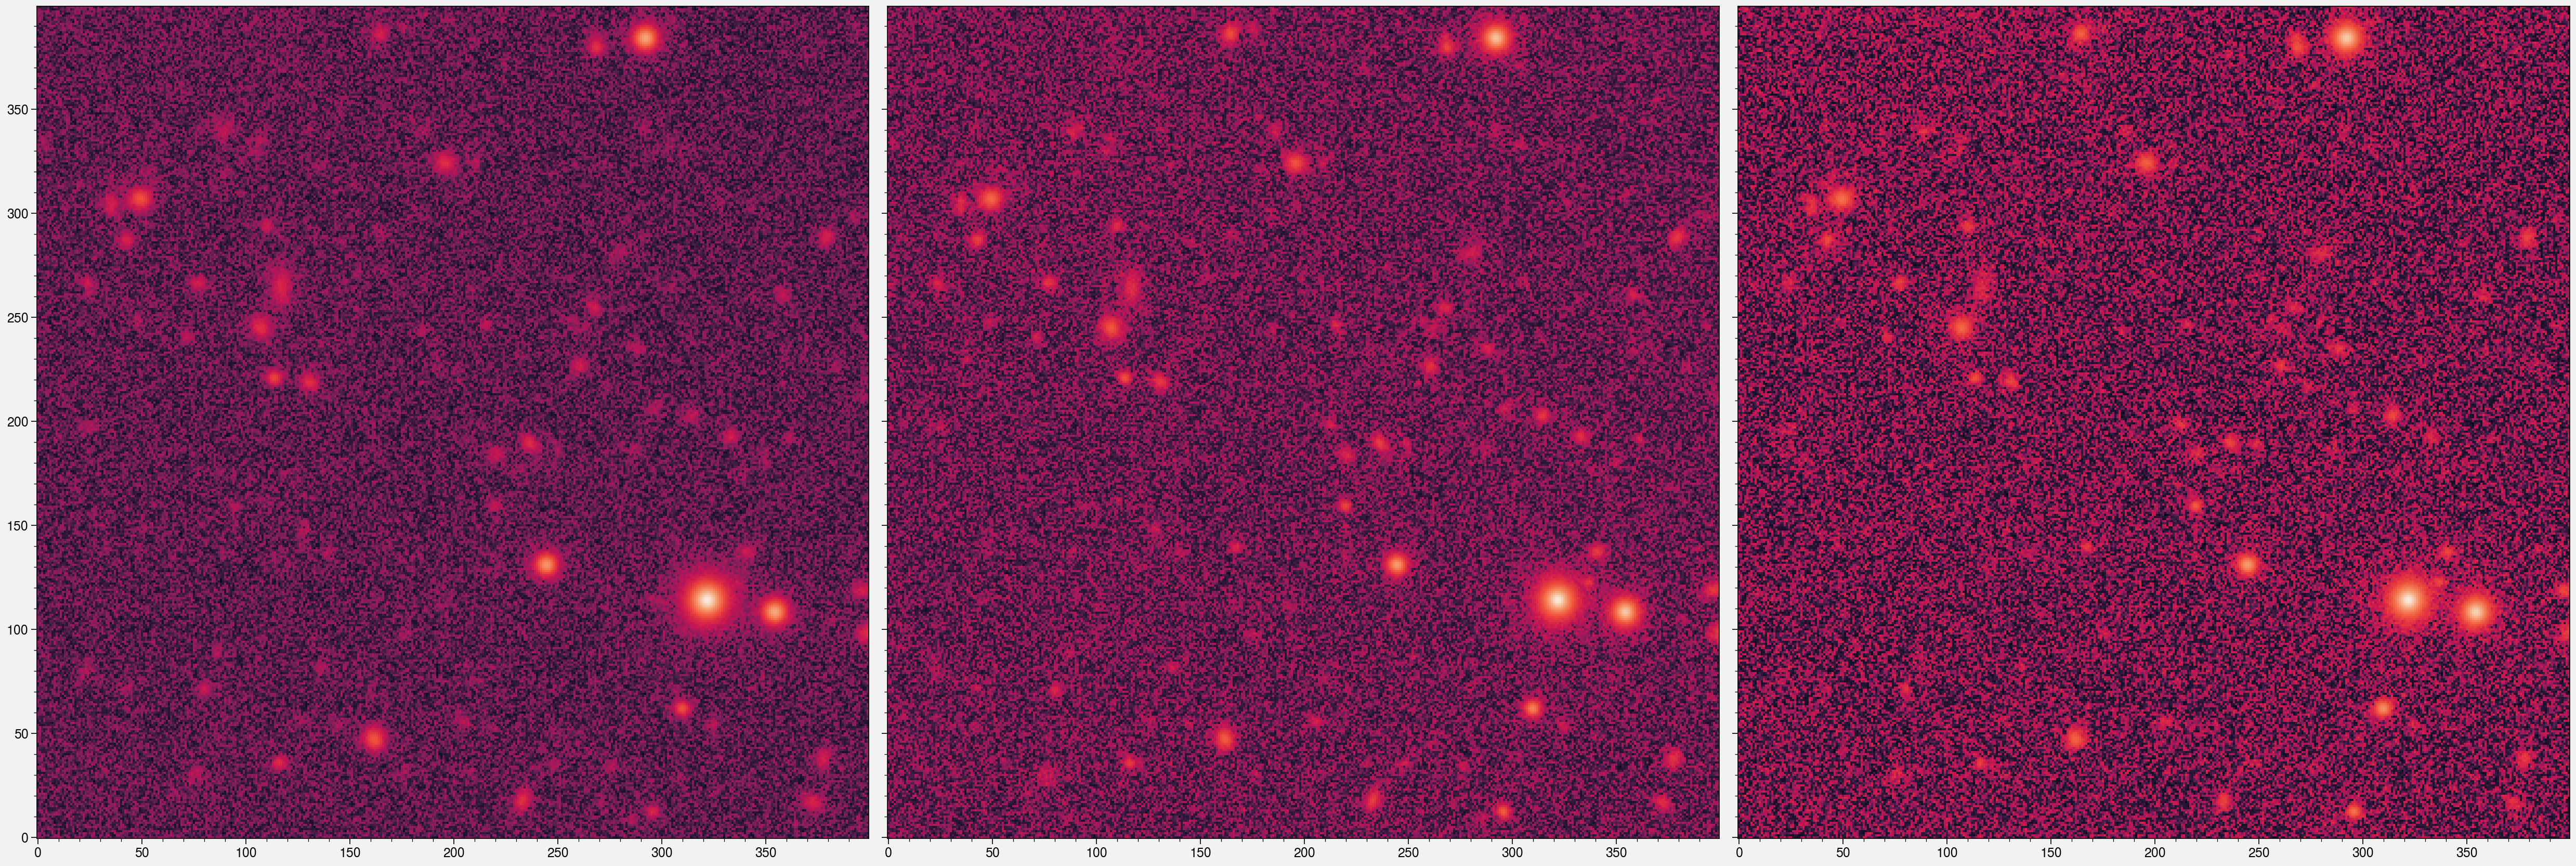

In [26]:
fig, axs = pplt.subplots(nrows=1, ncols=3, refaspect=1, refheight=8)

o = 2550
s = 400
for im, ax in zip([rim, iim, zim], axs):
    ax.imshow(np.arcsinh(im[o:o+s, o:o+s]), cmap='rocket', origin='lower')
    ax.grid(False)

In [27]:
m = meds.MEDS("DES2229-3957_r5366p01_i_pizza-cutter-slices.fits.fz")

In [30]:
ei = m._fits["epochs_info"].read()

In [36]:
msk = ei["flags"] == 0

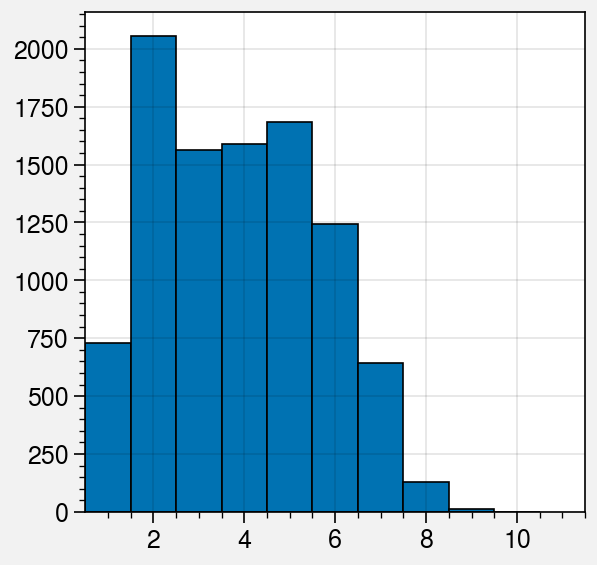

In [60]:
fig, axs = pplt.subplots()
h, be = np.histogram(ei["id"][msk], bins=np.arange(np.max(ei["id"][msk])+1))
_, be, _ = axs.hist(h[h>0], bins=np.arange(12)-0.5, align='mid')
axs.format(xlim=(0.5, 11.5))

In [61]:
np.median(h[h>0])

4.0

In [62]:
import glob

In [63]:
fnames = glob.glob("cat_*.fits")

In [64]:
fnames

['cat_000001.fits', 'cat_000002.fits', 'cat_000003.fits']

In [120]:
d = np.hstack([fitsio.read(f) for f in fnames])

In [121]:
d.dtype.names

('ID',
 'SLICE_ID',
 'MDET_STEP',
 'RA',
 'DEC',
 'RA_DET',
 'DEC_DET',
 'ROW_DET',
 'COL_DET',
 'IROW',
 'ICOL',
 'SLICE_ROW',
 'SLICE_COL',
 'SLICE_ROW_DET',
 'SLICE_COL_DET',
 'MASK_FLAGS',
 'FILENAME',
 'TILENAME',
 'FLAGS',
 'MDET_FLAGS',
 'MDET_S2N',
 'MDET_T',
 'MDET_T_ERR',
 'MDET_G_1',
 'MDET_G_2',
 'MDET_G_COV_1_1',
 'MDET_G_COV_1_2',
 'MDET_G_COV_2_1',
 'MDET_G_COV_2_2',
 'PSF_G_1',
 'PSF_G_2',
 'PSF_T',
 'MDET_T_RATIO',
 'MDET_BAND_FLUX_FLAGS',
 'MDET_R_FLUX',
 'MDET_I_FLUX',
 'MDET_Z_FLUX',
 'MDET_R_FLUX_ERR',
 'MDET_I_FLUX_ERR',
 'MDET_Z_FLUX_ERR',
 'ORMASK',
 'MFRAC',
 'BMASK',
 'PSFREC_FLAGS',
 'PSFREC_G_1',
 'PSFREC_G_2',
 'PSFREC_T')

In [77]:
for tn in np.unique(d["TILENAME"]):
    msk = d["TILENAME"] == tn
    print(tn, np.sum(msk))

DES0029+0418 90445
DES0031+0001 101309
DES0119-6039 90736
DES0121-3540 101693
DES0125-3540 101852
DES0125-3623 109234
DES0126-3706 107701
DES0128-3249 100384
DES0132-3457 106924
DES0137-3749 98338
DES0138-3249 109796
DES0139-3623 88636
DES0144-3206 109577
DES0146-3623 98459
DES0149-3540 109018
DES0151-3749 105757
DES0152-3415 84368
DES0211-0250 108106
DES0219-0541 88099
DES0221-4206 99033
DES0223-0707 70229
DES0232-0416 80247
DES0234-0207 90764
DES0254-1332 93795
DES0356-1707 98292
DES0420-6039 118242
DES0428-5040 100735
DES0440-4706 99245
DES0440-4831 97246
DES0449-4623 93347
DES0455-5123 94718
DES0457-4457 81653
DES0501-4623 86338
DES0502-4831 90075
DES2053-5205 79970
DES2055-4706 83992
DES2059-4957 88746
DES2119-4914 93124
DES2229-3957 63499


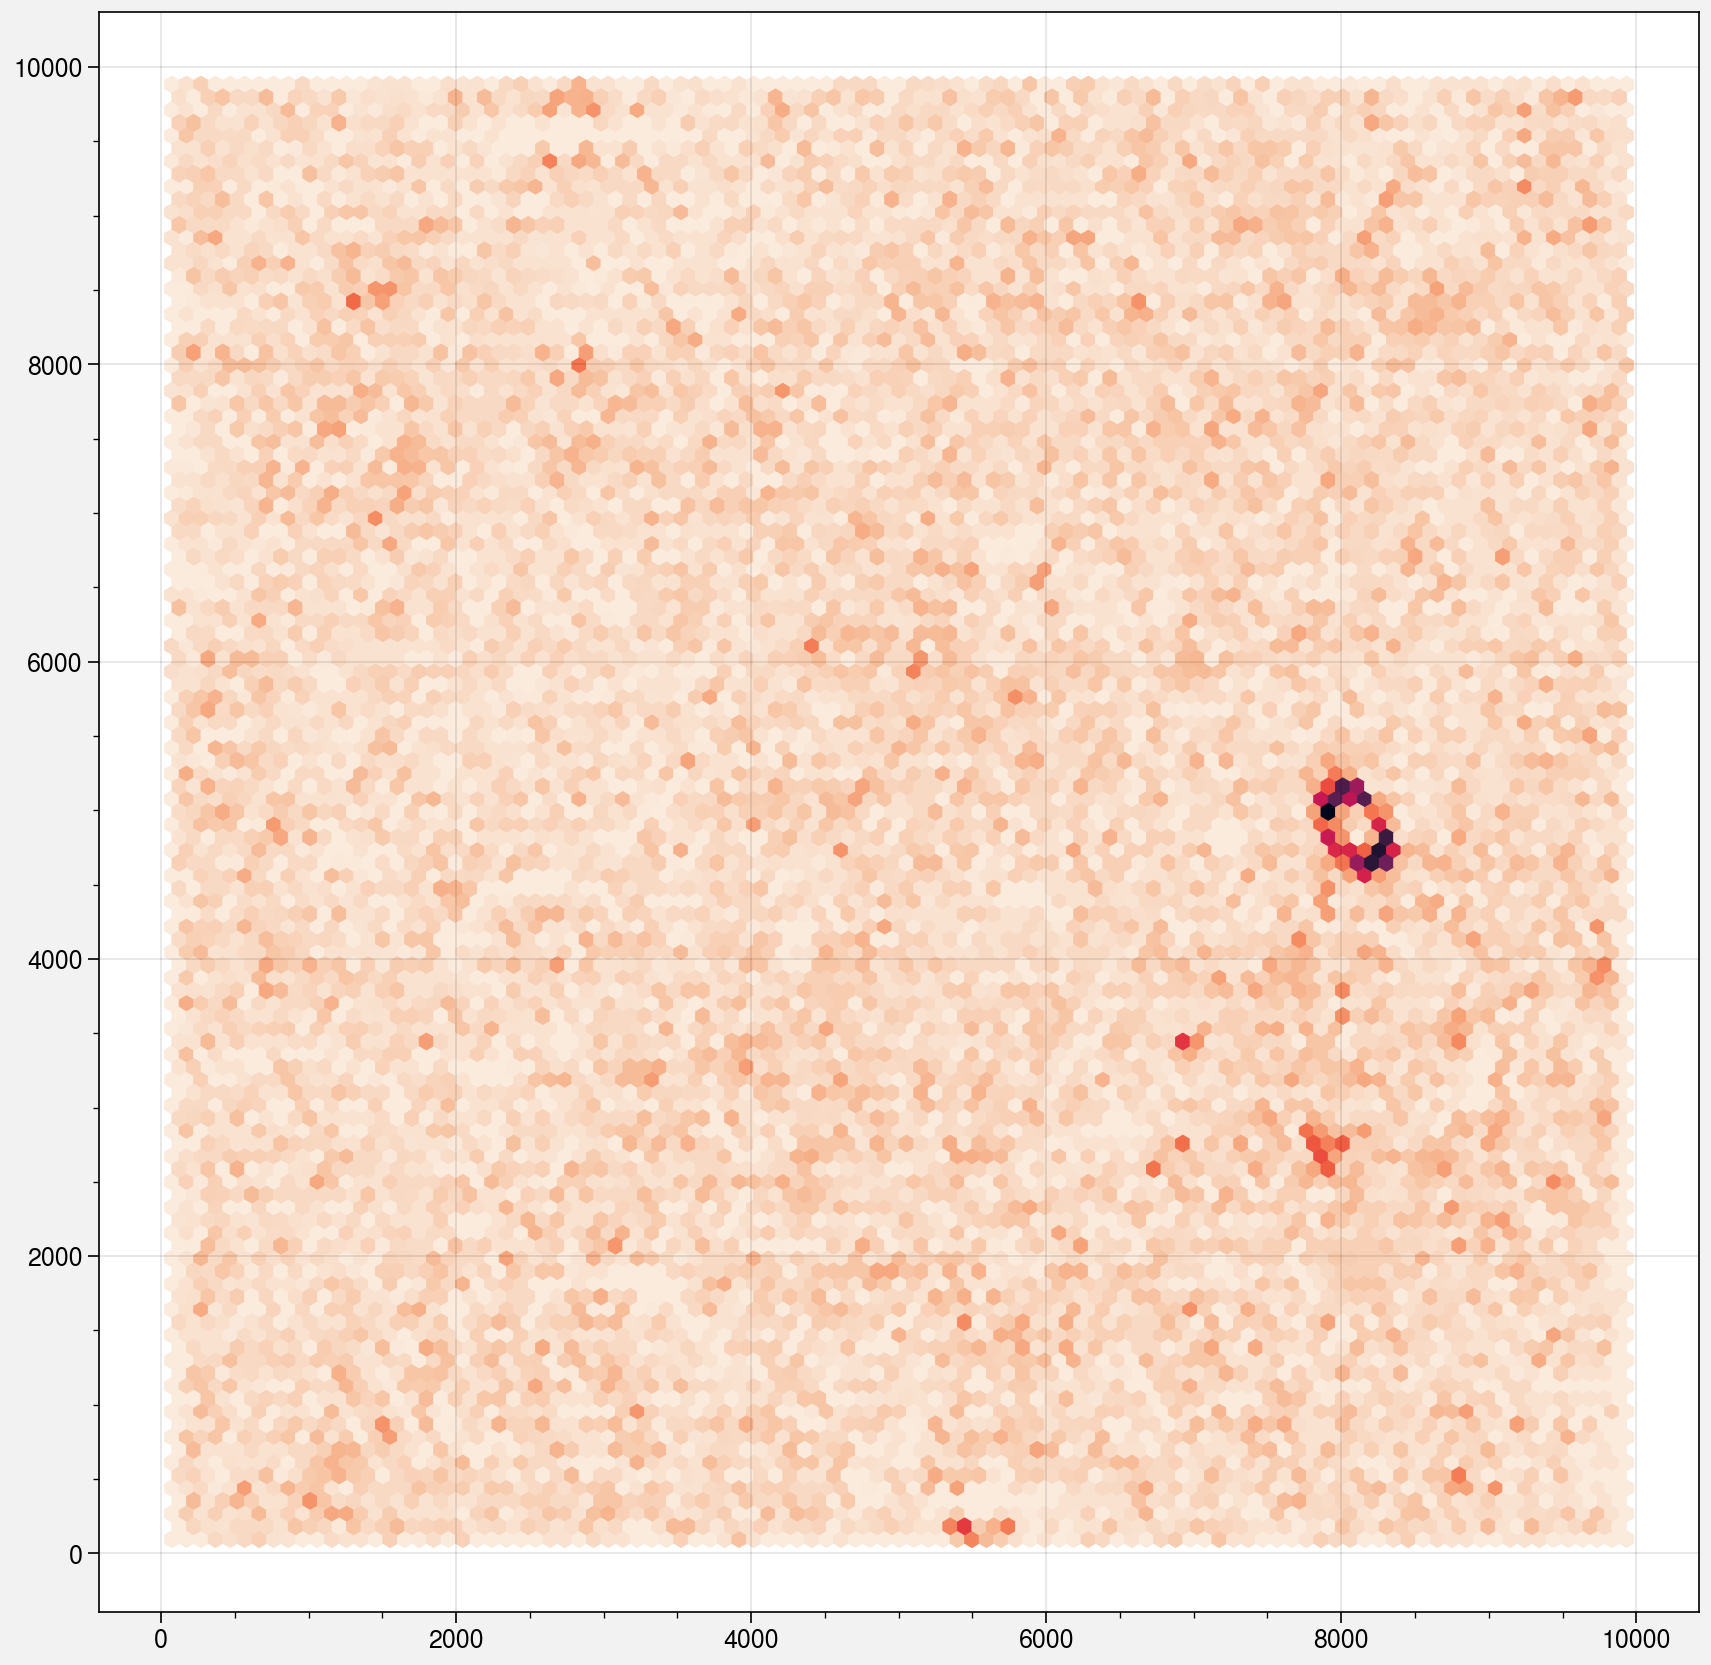

In [131]:
fig, axs = pplt.subplots(refwidth=8, refaspect=1)

msk = d["TILENAME"] == "DES0420-6039"
axs.hexbin(d["ICOL"][msk], d["IROW"][msk], bins=1000, cmap='rocket_r')

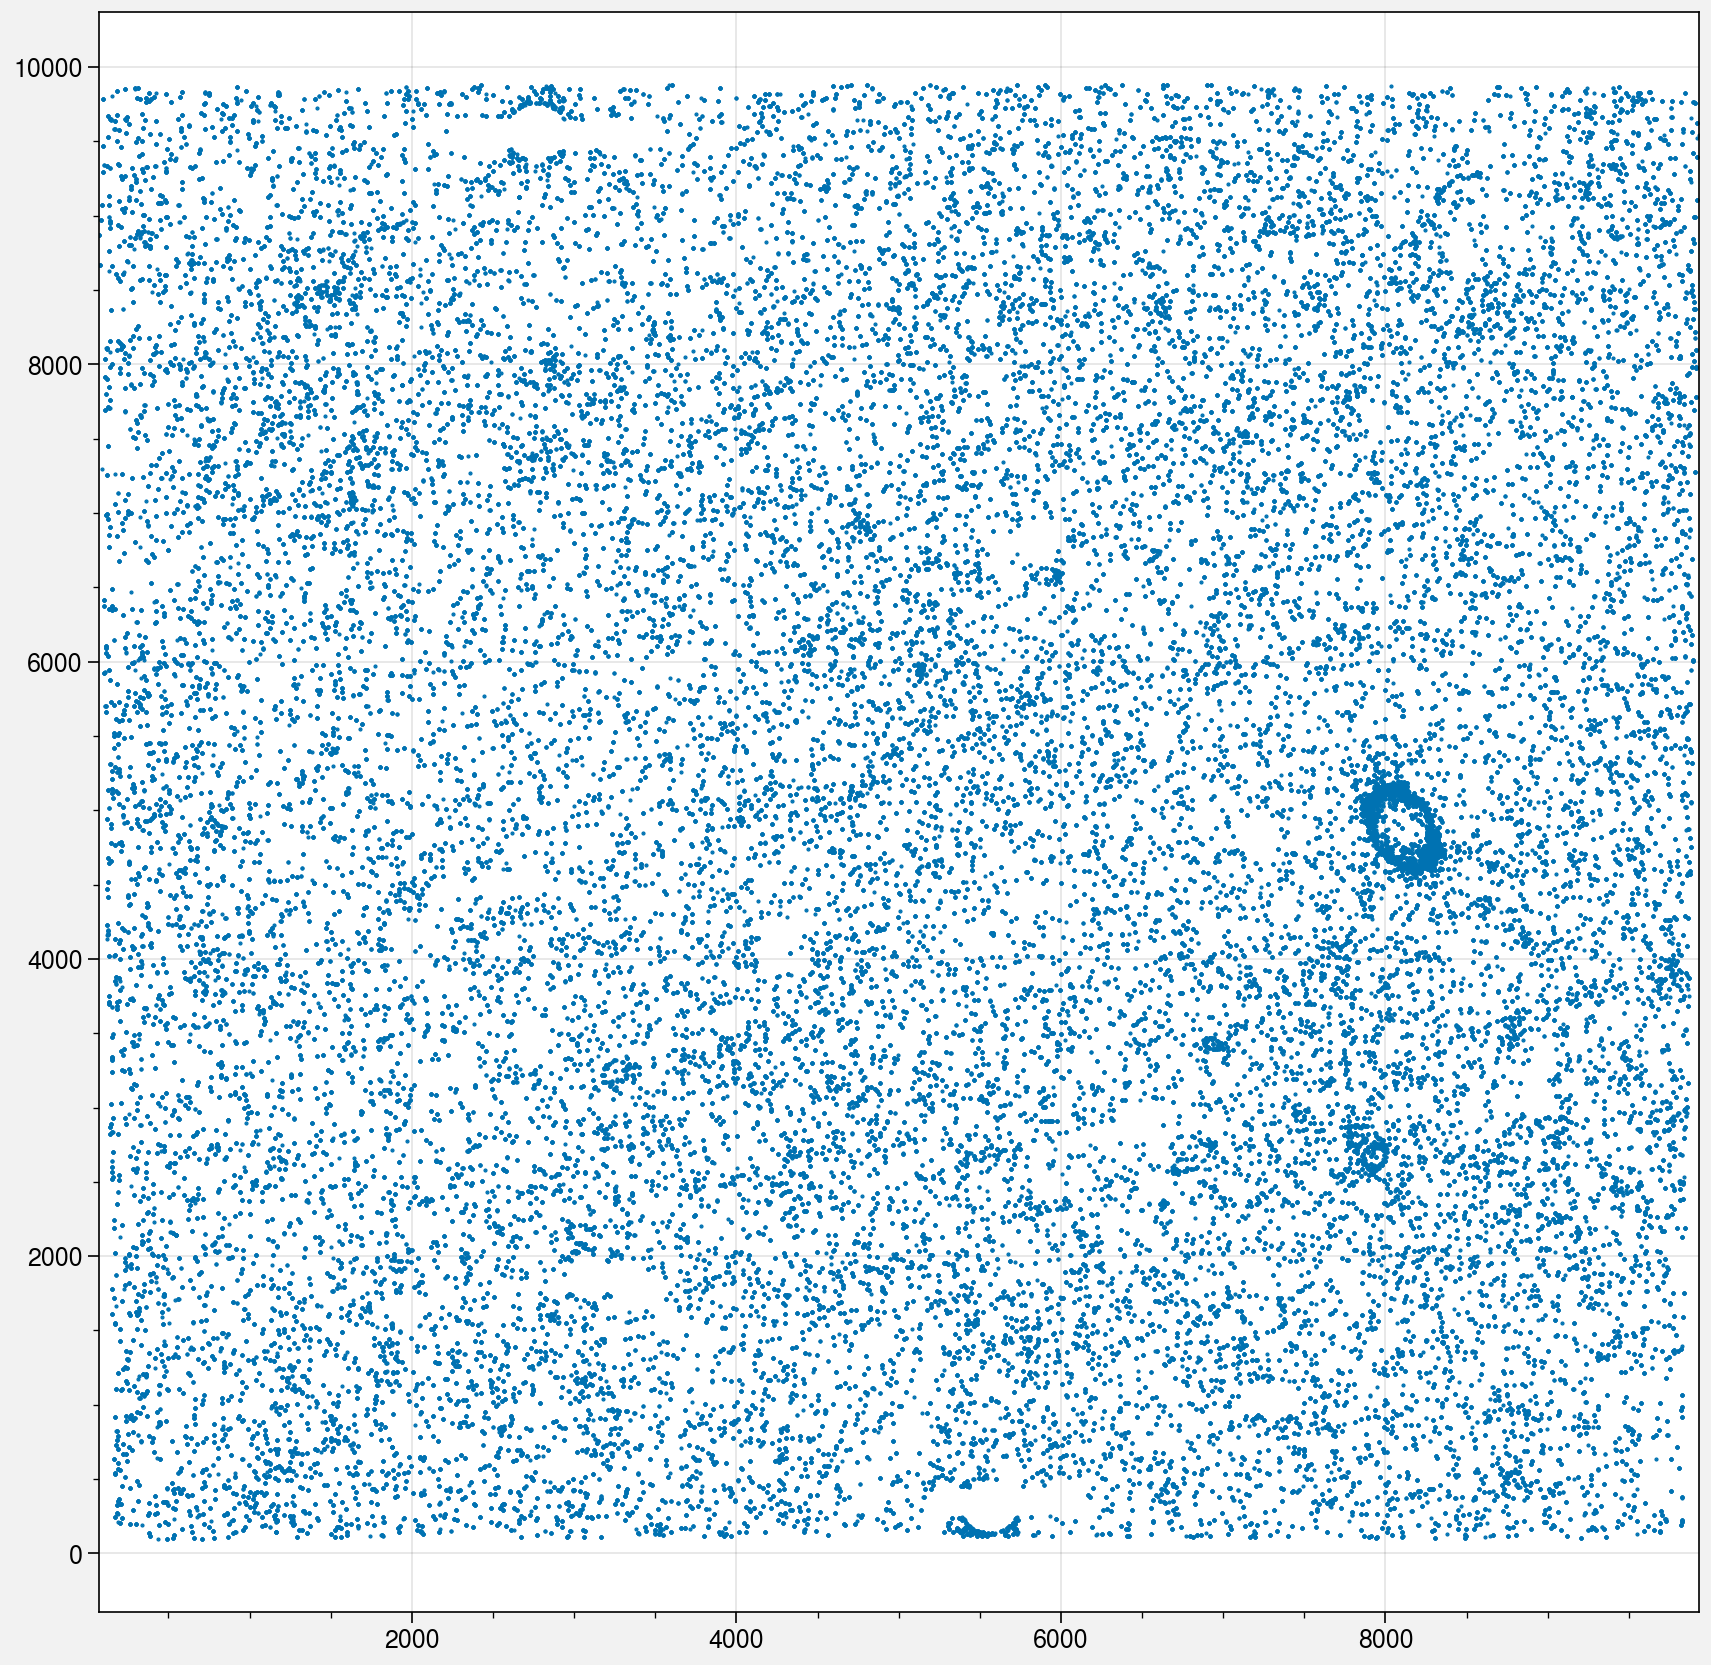

In [133]:
fig, axs = pplt.subplots(refwidth=8, refaspect=1)

axs.plot(d["ICOL"][msk], d["IROW"][msk], '.', markersize=1)

In [122]:
dc = fitsio.read("DES0420-6039_r5366p01_metadetect.fits.fz")

In [123]:
dc.dtype.names

('slice_id',
 'mdet_step',
 'ra',
 'dec',
 'ra_det',
 'dec_det',
 'row_det',
 'col_det',
 'row',
 'col',
 'slice_row',
 'slice_col',
 'slice_row_det',
 'slice_col_det',
 'mask_flags',
 'filename',
 'tilename',
 'flags',
 'mdet_flags',
 'mdet_s2n',
 'mdet_T',
 'mdet_T_err',
 'mdet_g',
 'mdet_g_cov',
 'psf_g',
 'psf_T',
 'mdet_T_ratio',
 'mdet_band_flux_flags',
 'mdet_band_flux',
 'mdet_band_flux_err',
 'ormask',
 'mfrac',
 'bmask',
 'psfrec_flags',
 'psfrec_g',
 'psfrec_T')

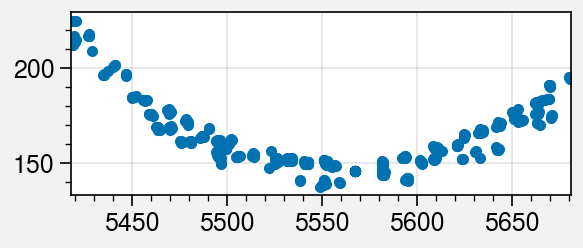

In [119]:
fig, axs = pplt.subplots()

msk = (
    (
        (d["slice_id"] == (54)) 
        |
        (d["slice_id"] == (54+99)) 
        |
        (d["slice_id"] == (55)) 
        |
        (d["slice_id"] == (55+99))
    )
    & ((d['bmask'] & 2**24) != 0)
    & (d["mdet_s2n"] > 10)
)
axs.plot(d["col"][msk], d["row"][msk], '.')
axs.set_aspect(1)

In [117]:
54+99

153

In [125]:
dn = fitsio.read("DES0420-6039_metadetect-v4_mdetcat_range0153-0154.fits.fz")

In [129]:
dn.dtype.descr

[('slice_id', '>i8'),
 ('mdet_step', '<U7'),
 ('ra', '>f8'),
 ('dec', '>f8'),
 ('ra_det', '>f8'),
 ('dec_det', '>f8'),
 ('y_det', '>f8'),
 ('x_det', '>f8'),
 ('y', '>f8'),
 ('x', '>f8'),
 ('slice_y', '>f8'),
 ('slice_x', '>f8'),
 ('slice_y_det', '>f8'),
 ('slice_x_det', '>f8'),
 ('mask_flags', '>i4'),
 ('filename', '<U54'),
 ('tilename', '<U12'),
 ('flags', '>i4'),
 ('mdet_flags', '>i4'),
 ('mdet_s2n', '>f8'),
 ('mdet_T', '>f8'),
 ('mdet_T_err', '>f8'),
 ('mdet_g_1', '>f8'),
 ('mdet_g_2', '>f8'),
 ('mdet_g_cov_1_1', '>f8'),
 ('mdet_g_cov_1_2', '>f8'),
 ('mdet_g_cov_2_2', '>f8'),
 ('psf_g', '>f8', (2,)),
 ('psf_T', '>f8'),
 ('mdet_T_ratio', '>f8'),
 ('mdet_flux_flags', '>i4'),
 ('mdet_r_flux', '>f8'),
 ('mdet_i_flux', '>f8'),
 ('mdet_z_flux', '>f8'),
 ('mdet_r_flux_err', '>f8'),
 ('mdet_i_flux_err', '>f8'),
 ('mdet_z_flux_err', '>f8'),
 ('ormask', '>i4'),
 ('mfrac', '>f4'),
 ('bmask', '>i4'),
 ('psfrec_flags', '>i4'),
 ('psfrec_g', '>f8', (2,)),
 ('psfrec_T', '>f8')]